# Assignment on Simple Linear Regression Technique
### 1) Delivery_time -> Predict delivery time using sorting time 
### 2) Salary_hike -> Build a prediction model for Salary_hike

## Problem Statement : Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Import Libraries 

In [114]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn import metrics

## Check the current working Directory for the path of the python notebook and data set

In [115]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3AFB-53CA

 Directory of C:\Users\Soham\Documents\PythonCode\Assignments\Simple Linear Regression

10/25/2021  04:27 PM    <DIR>          .
10/25/2021  04:27 PM    <DIR>          ..
10/25/2021  01:14 PM    <DIR>          .ipynb_checkpoints
10/25/2021  02:03 PM    <DIR>          Assignment-04-Simple-Linear-Regression-2-main
10/25/2021  01:02 PM               218 delivery_time.csv
10/25/2021  01:02 PM               318 Problem_statements.txt
10/25/2021  01:03 PM               454 Salary_Data.csv
10/25/2021  04:27 PM           117,829 SimpleLinearRegression.ipynb
               4 File(s)        118,819 bytes
               4 Dir(s)  183,256,432,640 bytes free


## Import the Salary_Data Set into Jupyter Notebook

In [116]:
df = pd.read_csv("Salary_Data.csv")
type(df)

pandas.core.frame.DataFrame

## Understanding the Data Set

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Find Shape of Data and Display First 10 records from first position (From Head)

In [118]:
print (df.shape,"Shape of Data Frame")
print ("="*50)
print (df.head(10))

(30, 2) Shape of Data Frame
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


## Building a Machine Learning Simple Linear Regression Model

In [119]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

#### We will be using YearsExperience variable on the x-axis and  Salary on Y axis 

#### Divide data set into an x-array (which is the input value of our model) and a y-array (which is the output value of our model). 

In [120]:
X= df.iloc[:, 0:1].values
Y= df.iloc[:,1:2].values
print(X)
print(Y)
print ("="*50)
print(len(X), "YearsExperience")
print(len(Y), "Salary")


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]
30 YearsExperience
30 Salary


#### Using scatter plot display YearsExperience vs Salary

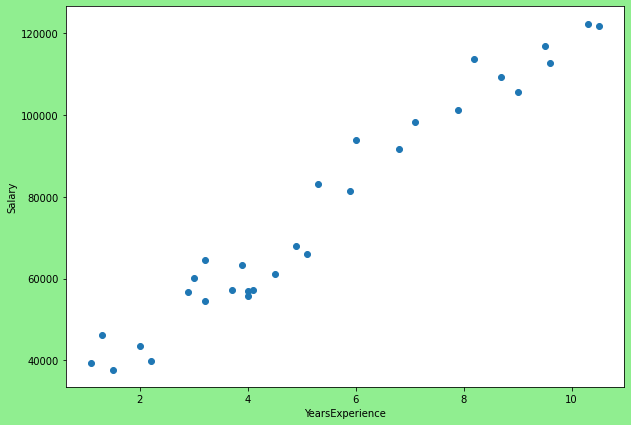

In [121]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(X,Y,);
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

#### Splitting our Data Set into Training Data (75%) and Test Data (25%).

In [122]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0, shuffle = 'True')

In [123]:
#x_train=x_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

22
8
22
8


### Building and Training the Model

In [124]:
model = LinearRegression()

#### Use scikit-learn’s fit method to train this model on  training data.

In [125]:
reg=model.fit(x_train,y_train)

#### Examine the model’s coefficients and intercept of the regression equation

In [126]:
print (reg.coef_)
print (reg.intercept_)

[[9379.71049195]]
[26986.69131674]


#### Plot the regression line

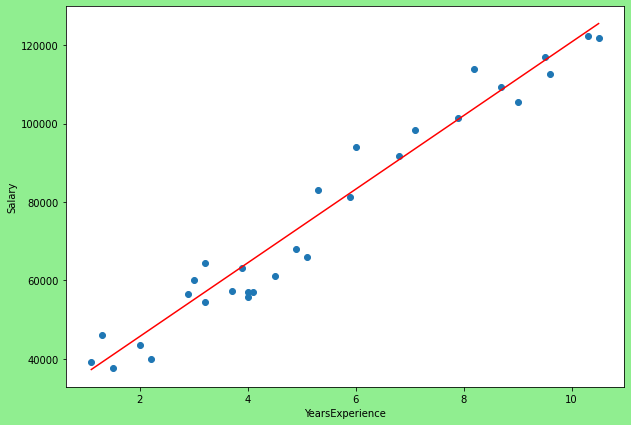

In [127]:
#y=mx+c

plt.figure(figsize=(10,7),facecolor="lightgreen")

plt.scatter(X,Y,);
plt.plot(df.YearsExperience,X*reg.coef_[0]+reg.intercept_,color="red");

plt.xlabel("YearsExperience");
plt.ylabel("Salary")

plt.show()




## Making Prediction From Our Model

In [128]:
y_pred = model.predict(x_test)

In [129]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(len(y_pred))

22
8
22
8
8


In [130]:
df_ap = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_ap

,Actual,Predicted
0,37731.0,41056.257055
1,122391.0,123597.709384
2,57081.0,65443.504334
3,63218.0,63567.562235
4,116969.0,116093.940990
5,109431.0,108590.172597
6,112635.0,117031.912039
7,55794.0,64505.533285


#### The prediction variable holds the predicted value of the feature stored in x_test. Since we used the train_test_split method to store the actual value in y_test, what we want to do next is compare predicted value with the values of y_test.

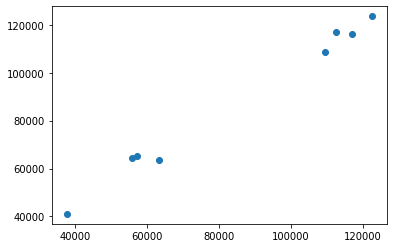

In [131]:
plt.scatter(y_test, y_pred)

(array([2., 0., 0., 0., 1., 1., 0., 1., 1., 2.]),
 array([-8711.53328452, -7752.87405509, -6794.21482566, -5835.55559623,
        -4876.8963668 , -3918.23713737, -2959.57790794, -2000.91867851,
        -1042.25944908,   -83.60021965,   875.05900978]),
 <BarContainer object of 10 artists>)

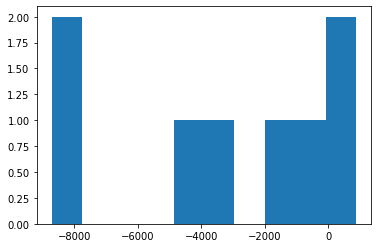

In [132]:
plt.hist(y_test - y_pred)

## Testing the Performance of our Model
### Main performance metrics used for regression machine learning models are :

#### a. Mean absolute error
#### b. Mean squared error
#### c. Root mean squared error
#### d. R-Square metrics

### Mean Absolute Error (MAE)

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3508.5455930660555


### Mean Squared Error (MSE)

In [134]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 22407940.143340684


### Root Mean Squared Error (RMSE)

In [135]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4733.70258289858


### R-Square metrics

In [136]:
1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)

0.9544031835260334

### Model Score

In [137]:
model.score(X, Y)

0.955975487542377

## 1) Delivery_time -> Predict delivery time using sorting time

## Understanding the Data Set

In [138]:
df1 = pd.read_csv("delivery_time.csv")

## Find Shape of Data and Display First 10 records from first position (From Head)

In [139]:
print (df1.shape,"Shape of Data Frame")
print ("="*50)
print (df1.head(10))

(21, 2) Shape of Data Frame
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


## Building a Machine Learning Simple Linear Regression Model

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [141]:
df1.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

#### We will be using Sorting Time  on the x-axis and  Delivery Time on Y axis
#### Divide data set into an x-array (which is the input value of our model) and a y-array (which is the output value of our model). 

In [142]:
X1= df1.iloc[:, 1:2].values
Y1= df1.iloc[:,0:1].values
print(X1)
print(Y1)
print ("="*50)
print(len(X1), "Sorting Time")
print(len(Y1), "Delivery Time")

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]
[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]
21 Sorting Time
21 Delivery Time


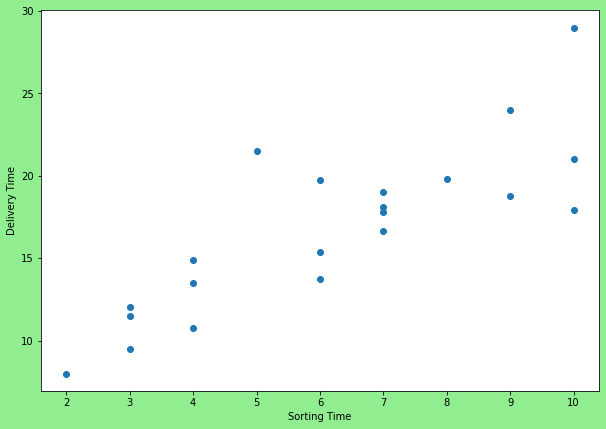

In [143]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(X1,Y1,);
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

#### Splitting our Data Set into Training Data (75%) and Test Data (25%).

In [144]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=0, shuffle = 'True')

### Building and Training the Model

#### Use scikit-learn’s fit method to train this model on  training data.

In [145]:
model1 = LinearRegression()
reg1=model1.fit(x1_train,y1_train)

#### Examine the model’s coefficients and intercept of the regression equation

In [146]:
print (reg1.coef_)
print (reg1.intercept_)

[[1.90254464]]
[4.99904762]


#### Changing the names of the columns

In [147]:
df1 = df1.rename({'Sorting Time': 'SortingTime'}, axis=1)
df1 = df1.rename({'Delivery Time': 'DeliveryTime'}, axis=1)

#### Plot the regression line

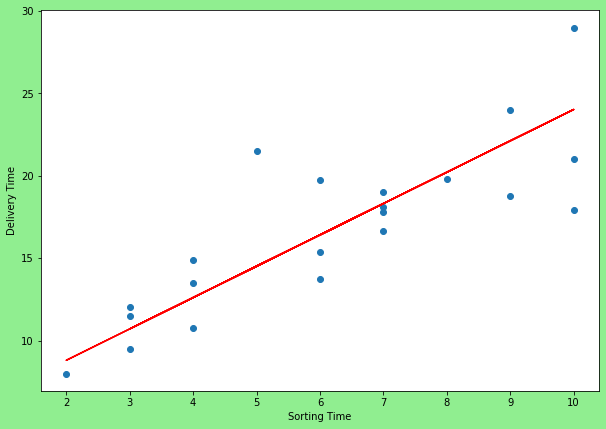

In [148]:
#y=mx+c

plt.figure(figsize=(10,7),facecolor="lightgreen")

plt.scatter(X1,Y1,);
plt.plot(df1.SortingTime,X1*reg1.coef_[0]+reg1.intercept_,color="red");


plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")

plt.show()


## Making Prediction From Our Model

#### The prediction variable holds the predicted value of the feature stored in x_test. Since we used the train_test_split method to store the actual value in y_test, what we want to do next is compare predicted value with the values of y_test.


In [149]:
y1_pred = model1.predict(x1_test)

In [150]:
print(len(x1_train))
print(len(x1_test))
print(len(y1_train))
print(len(y1_test))
print(len(y1_pred))

15
6
15
6
6


In [151]:
df_ap1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df_ap1

,Actual,Predicted
0,17.90,24.024494
1,11.50,10.706682
2,21.50,14.511771
3,13.50,12.609226
4,10.75,12.609226
5,19.83,20.219405


## Testing the Performance of our Model

### Main performance metrics used for regression machine learning models are :

#### a. Mean absolute error
#### b. Mean squared error
#### c. Root mean squared error
#### d. R-Square metrics

### Mean Absolute Error (MAE)

In [152]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred)) 

Mean Absolute Error: 2.840907738095238


### Mean Squared Error (MSE)

In [153]:
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  

Mean Squared Error: 15.229327411290031


### Root Mean Squared Error (RMSE)

In [154]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Root Mean Squared Error: 3.9024770865810385


### R-Square metrics

In [155]:
1 - (1-model1.score(X1, Y1))*(len(Y1)-1)/(len(Y1)-X1.shape[1]-1)

0.6485647113088073

### Model Score

In [156]:
model1.score(X1, Y1)

0.666136475743367